In [12]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time
import seaborn as sns
import matplotlib.patheffects as PathEffects

In [13]:
data = pd.read_csv("Q:\mnist_train.csv", header=None)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
all_labels = data.pop(0)

In [32]:
all_labels.head()

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64

In [33]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Removing number less than 6:

In [15]:
less = data.loc[data[0] < 6]

##### Removing labels:

In [16]:
less.pop(0)

0        5
1        0
2        4
3        1
5        2
6        1
7        3
8        1
9        4
10       3
11       5
12       3
14       1
16       2
20       4
21       0
23       1
24       1
25       2
26       4
27       3
28       2
30       3
34       0
35       5
37       0
40       1
44       3
47       5
49       3
        ..
59947    5
59951    4
59952    0
59954    1
59955    3
59956    5
59957    3
59958    1
59960    5
59961    3
59964    3
59965    1
59968    5
59970    2
59971    2
59972    0
59974    2
59975    4
59978    3
59979    1
59980    3
59983    2
59984    1
59985    2
59987    0
59991    2
59993    5
59994    1
59996    3
59997    5
Name: 0, Length: 36017, dtype: int64

In [17]:
less.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
more = data.loc[data[0]>5]

##### Removing labels:

In [19]:
more.pop(0)

4        9
13       6
15       7
17       8
18       6
19       9
22       9
29       7
31       8
32       6
33       9
36       6
38       7
39       6
41       8
42       7
43       9
45       9
46       8
48       9
52       7
54       9
55       8
57       9
62       6
66       6
71       7
73       6
79       7
80       9
        ..
59935    7
59936    8
59937    7
59938    7
59939    9
59942    9
59946    8
59948    9
59949    8
59950    8
59953    7
59959    6
59962    8
59963    7
59966    6
59967    8
59969    9
59973    9
59976    6
59977    7
59981    6
59982    6
59986    6
59988    7
59989    8
59990    9
59992    9
59995    8
59998    6
59999    8
Name: 0, Length: 23983, dtype: int64

In [20]:
more.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
six = data.loc[data[0]==6]

In [22]:
six_labels = six.pop(0)

In [23]:
six.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Grabbing labels:

In [24]:
labels = data.loc[:,0]

In [25]:
labels.head()

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64

### Grab first MNIST Array:

In [26]:
first = data.iloc[0]

In [27]:
first = first.tolist()

In [28]:
first

[5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 18,
 18,
 18,
 126,
 136,
 175,
 26,
 166,
 255,
 247,
 127,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 36,
 94,
 154,
 170,
 253,
 253,
 253,
 253,
 253,
 225,
 172,
 253,
 242,
 195,
 64,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 49,
 238,
 253,
 253,
 253,
 253,
 253,
 253,
 253,
 253,
 251,
 93,
 82,
 82,
 56,
 39,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [29]:
first.pop(0)

5

In [30]:
first

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 18,
 18,
 18,
 126,
 136,
 175,
 26,
 166,
 255,
 247,
 127,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 36,
 94,
 154,
 170,
 253,
 253,
 253,
 253,
 253,
 225,
 172,
 253,
 242,
 195,
 64,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 49,
 238,
 253,
 253,
 253,
 253,
 253,
 253,
 253,
 253,
 251,
 93,
 82,
 82,
 56,
 39,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18,

In [34]:
#mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    img = Image.fromarray(two_d, 'L')
    return img


#batch_xs, batch_ys = mnist.test.next_batch(1)
gen_image(first).show()

In [43]:
y_train = all_labels
X_train = data
X_submission = less

In [36]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)

[0.09704664 0.07095924]


In [37]:
print(X_train.shape)
print(pca_result.shape)

(60000, 784)
(60000, 2)


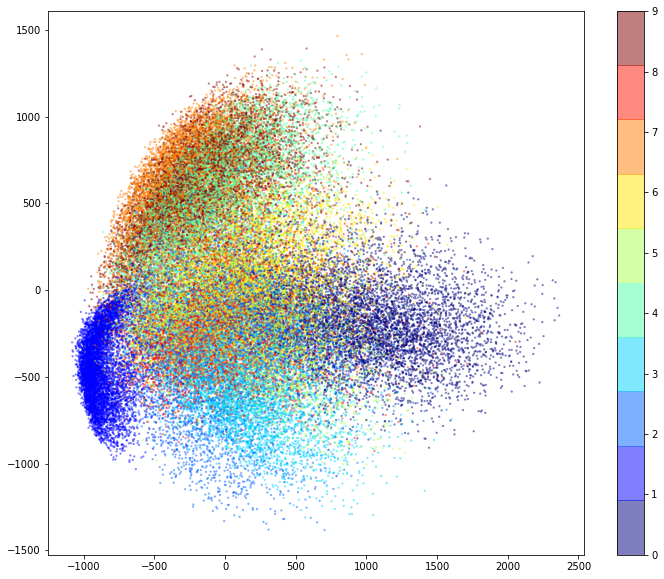

In [68]:
plt.figure(figsize=(12,10))
plt.scatter(pca_result[:100000, 0], pca_result[:100000, 1], c=y_train[:100000].values.flatten(), edgecolors='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

In [70]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_submission_transformed = pca.transform(X_submission)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, y_train, test_size=0.2, random_state=13)

components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = [1, 2, 3, 4, 5, 6, 7]

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )


for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        #predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)  

Components =  5 , neighbors =  1 , Score =  0.6906666666666667
Components =  5 , neighbors =  2 , Score =  0.68
Components =  5 , neighbors =  3 , Score =  0.7165
Components =  5 , neighbors =  4 , Score =  0.7266666666666667
Components =  5 , neighbors =  5 , Score =  0.73575
Components =  5 , neighbors =  6 , Score =  0.7391666666666666
Components =  5 , neighbors =  7 , Score =  0.7429166666666667
Components =  10 , neighbors =  1 , Score =  0.9135
Components =  10 , neighbors =  2 , Score =  0.91175
Components =  10 , neighbors =  3 , Score =  0.9263333333333333
Components =  10 , neighbors =  4 , Score =  0.9269166666666667
Components =  10 , neighbors =  5 , Score =  0.9285833333333333
Components =  10 , neighbors =  6 , Score =  0.9288333333333333
Components =  10 , neighbors =  7 , Score =  0.9290833333333334
Components =  15 , neighbors =  1 , Score =  0.9535
Components =  15 , neighbors =  2 , Score =  0.9524166666666667
Components =  15 , neighbors =  3 , Score =  0.96066666

In [69]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))

x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots()
plt.imshow(scores, cmap='hot', interpolation='none', vmin=.90, vmax=1)
plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(x, neighbors)
plt.yticks(y, components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

ValueError: cannot reshape array of size 18 into shape (10,7)

Text(0,0.5,'Cumulative explained variance')

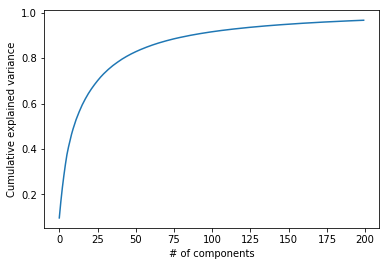

In [46]:
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

# Iris Data:

In [47]:
iris = datasets.load_iris()

In [48]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [49]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [50]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [51]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461621 0.05301557]


In [52]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

<Figure size 432x288 with 0 Axes>

Text(0.5,1,'PCA of IRIS dataset')

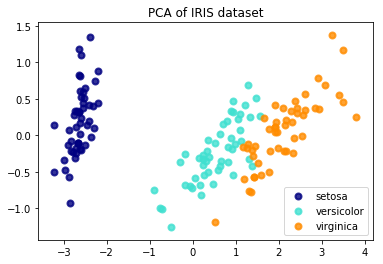

In [53]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Text(0.5,1,'LDA of IRIS dataset')

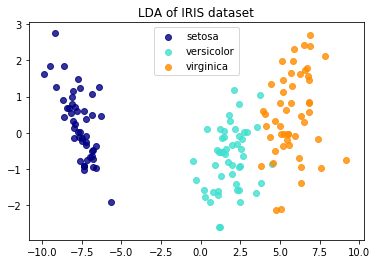

In [54]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

# Digits Data:

In [55]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

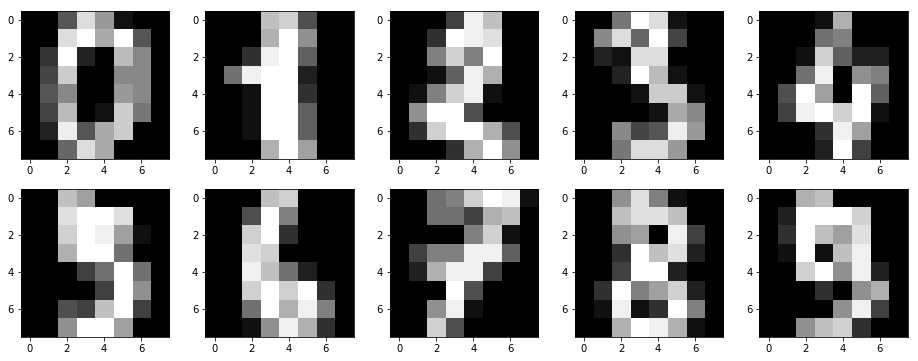

In [56]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

Projecting 64-dimensional data to 2D


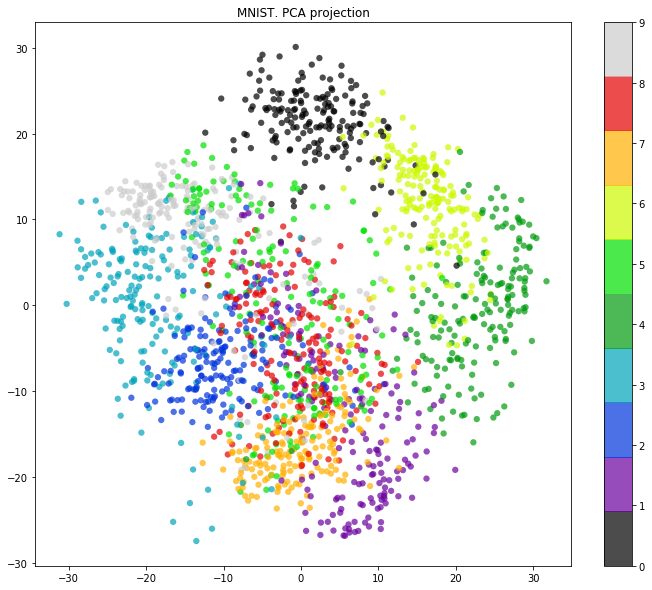

In [57]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

Wall time: 52.6 s


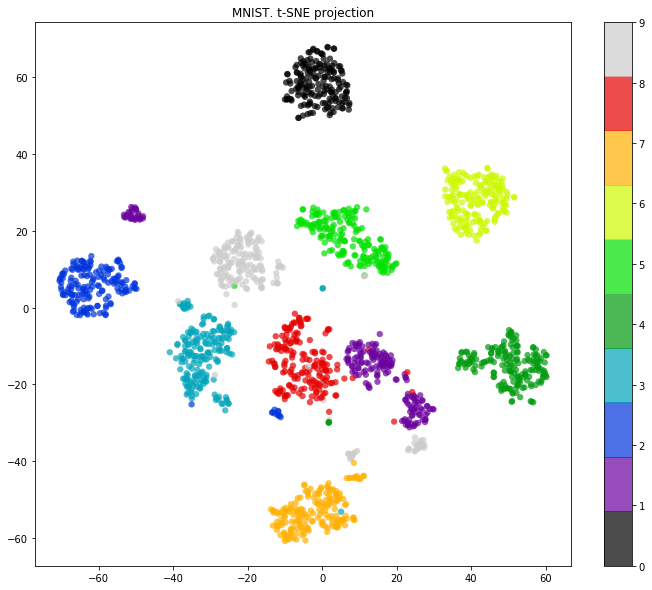

In [58]:
%%time

tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

(<Figure size 576x576 with 1 Axes>,
 [Text(35.1412,49.0518,'0'),
  Text(-1.20464,-15.7391,'1'),
  Text(-48.6733,-17.7098,'2'),
  Text(-38.29,20.2608,'3'),
  Text(33.918,-39.8033,'4'),
  Text(8.07994,21.03,'5'),
  Text(49.5953,2.4024,'6'),
  Text(-5.96337,-48.3856,'7'),
  Text(-15.3029,-1.47993,'8'),
  Text(-15.0129,33.071,'9')])

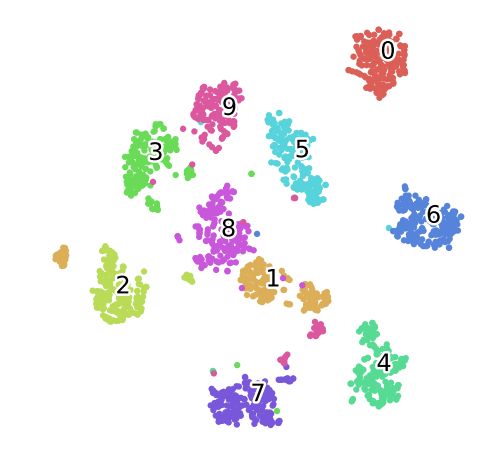

In [59]:
RS = 20150101

X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(X)

def scatter(x, colors):
    
    palette = np.array(sns.color_palette("hls", 10))

    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    
    txts = []
    for i in range(10):
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, y)
#plt.savefig('images/digits_tsne-generated.png', dpi=120)